### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Lecture 3: Graphs, Relations and a Matrix

Import the `networkx` package and construct a small graph `G`.

In [1]:
import networkx as nx
G = nx.Graph(["AB", "BC", "BD", "CD", "DE"])
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(G, **opts)

##  Adjacency Matrix

A useful algebraic way to represent a graph is given by its __adjacency matrix__.  This is square matrix $A$, with rows and columns corresponding to the vertices of the graph, and an entry $1$ or $0$ in row $i$, column $j$, if
the corresponding vertices are joined by an edge or not.
The edge $AB$ in the example above this gives an entry $1$
in row 1 (corresponding to vertex $A$) and column 2 (corresponding to
vertex $B$.  And another entry $1$ in row 2 column 1.  The full adjacency matrix
of the above graph is as follows.
$$A = \left[
\begin{array}{cccc}
0&1&0&0&0\\
1&0&1&1&0\\
0&1&0&1&0\\
0&1&1&0&1\\
0&0&0&1&0
\end{array}
\right]$$

In `networkx`, the adjacency matrix is computed with the `adjacency_matrix` command.
This matrix is internally represented as a `numpy` sparse matrix (as in general many of its
entries are $0$) and needs to be converted (e.g. by the `todense` command) in order
to be displayed as a proper matrix.

In [2]:
A = nx.adjacency_matrix(G)
print(A)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1


In [3]:
print(A.todense())

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


Note that $A = (a_{ij})$, like every adjacency matrix of a simple
graph, is **symmetric** (about the diagonal): $a_{ij} = a_{ji}$ for all
$i, j$.  Also, all diagonal entries are $0$.

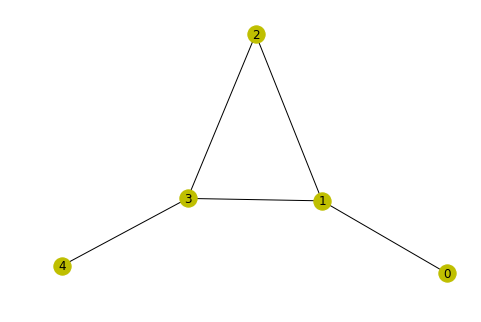

In [4]:
H = nx.from_numpy_matrix(A.todense())
nx.draw(H, **opts)

In [5]:
print((A**0).todense())

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


## Degree

The **degree** of a vertex $x$ in a simple graph is the number of
vertices it is connected to in the graph (it's number of **neighbours**, or **friends**).
The degree can serve as a (simple) measure of the importance of a node
in a network.  

<div class="alert alert-info">
    <b>Fact.</b> The <b>average degree</b> of the nodes in a network depends
(only) on the number $n$ of nodes, and the number $m$ of edges in the
network.
</div>

This can be seen as follows:  Writing $k_i$ for the degree of vertex $x_i$, this number
easily be determined from the adjacency matrix $A$ as the number of
entries $1$ in row $i$ (or in column $i$):
$$k_i = \sum_j a_{ij} = \sum_j a_{ji}.$$
As every edge contributes to the degree of $2$ nodes, the sum of all degrees
equals twice the number of edges:
$$\sum_i k_i = 2m,$$
whence the **average degree** is
$$c = \frac1n \sum_i k_i = \frac{2m}{n}.$$

As a consequence, any simple graph $G$ has an even number of nodes of odd degree.
This fact is known as [Euler's Handshake Lemma](https://en.wikipedia.org/wiki/Handshaking_lemma).

In our graph $G$, the column sums of the adjacency matrix `A` are:

In [6]:
A.sum(0)

matrix([[1, 3, 2, 3, 1]], dtype=int64)

and the row sums are:

In [7]:
A.sum(1)

matrix([[1],
        [3],
        [2],
        [3],
        [1]])

and both agree with the degrees of the nodes of $G$:

In [8]:
G.degree()

DegreeView({'A': 1, 'B': 3, 'C': 2, 'D': 3, 'E': 1})

The sum of the degrees is $8$, the average degree is $\frac{2m}{n} = 5$,
and there are $4$ nodes of odd degree.

In [9]:
A.sum()

10

## Graphs are Relations

Recall the following definitions.

<div class="alert alert-danger">
    <b>Definition.</b>  A <b>relation</b> from a set $X$ to a set $Y$ is (nothing but) a subset
$R$ of the Cartesian product $X \times Y = \{(x, y) :  x \in X,\, y \in Y \}$.
    We say that $x \in X$ is <b>$R$-related</b> to $y \in Y$ whenever $(x, y) \in R$
and then write $x R y$.
</div>

* The **adjacency matrix** of a relation $R \subseteq X \times Y$
is the matrix with one row for each element $x \in X$ and one column for each
element $y \in Y$, and it has an entry $1$ in row $x$ and column $y$
if $x R y$, and entries $0$ otherwise.

* In many cases, $Y = X$, i.e., $R$ is a **homogeneous** relation.
In this case, we say that $R$ is a relation **on** $X$.  Such a relation
can have one or more of the following properties.

<div class="alert alert-danger">
    <ul>
        <li> (R) $R$ is <b>reflexive</b> if $xRx$ for all $x \in X$;</li>
        <li> (S) $R$ is <b>symmetric</b> if $xRy$ implies $yRx$ for all $x, y \in X$;</li>
    <li> (T) $R$ is <b>transitive</b> if $xRy$ and $yRz$ imply that $xRz$ for all $x, y, z \in X$;</li>
    </ul>
    <ul>
        <li> (I) $R$ is <b>irreflexive</b> if not $xRx$ for all $x \in X$;</li>
    <li> (A) $R$ is <b>antisymmetric</b> if $xRy$ and $yRx$ imply that
        $x = y$ for all $x, y \in X$.</li>
    </ul>
</div>

* A relation that is (RST), i.e., reflexive, symmetric and transitive, is
called an **equivalence relation**, and it partitions the set $X$ into
(mutually disjoint) parts, called **equivalence classes**.  

* A relation
that is (RAT) is called a **partial order** (such as the **divides**
partial order on the natural numbers, or the **contains** relation
between the subsets of a set).

* In view of these notions, we can now describe simple graphs and some
of their properties
as follows: A *simple* graph with node set $X$ is a *symmetric*,
*irreflexive* relation on $X$.  

* (A *directed* graph with node set $X$
is *irreflexive* if it has *no loops*.  And it is *antisymmetric* if
every edge has a *unique direction*.)

The article [Counting Transitive Relations] (in the *Journal of
Integer Sequences*) contains a systematic account on the various types
of relations that can be distinguished by these 5 properties, and a
discussion of how to count them (up to equivalence) in case the
underlying set $X$ is finite.

[counting transitive relations]: https://cs.uwaterloo.ca/journals/JIS/VOL7/Pfeiffer/pfeiffer6.html

##  Code Corner

### `Numpy`

* `sum`:  form the sum of matrix entries, either all or along a specified axis

* `todense`:  convert a sparse matrix into a proper matrix

* `A * A`: matrix multiplication

* `A**0`:  the $0$-th power of a square matrix is the identity matrix of the same size.

### `networkx`

* `adjacency_matrix` computes the adjacency matrix of a graph

  * `from_numpy_matrix` constructs a graph from its adjacency matrix

##  Exercises

1. Use the `complete_graph` function in `networkx` to construct a $5 \times 5$ matrix
   with entries $0$ on the diagonal and all other entries $1$.